In [1]:
from nngmodel import get_testing_model

model_path = "model.h5"

model = get_testing_model()
model.load_weights(model_path)
model.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, None, None, 6 1792        lambda_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 6 0           conv1_1[0][0]                    
__________________________________________________________________________________________________
conv1_2 (C

(1086, 802, 3)


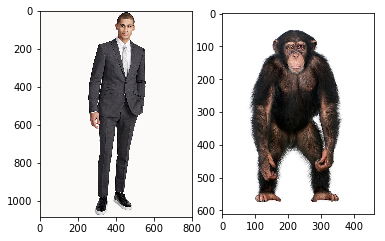

In [46]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

image_path = "human.jpg"
c_image_path = "chim.jpg"

image = mpimg.imread(image_path)
print(image.shape)
c_image = mpimg.imread(c_image_path)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.imshow(image)
ax = fig.add_subplot(1,2,2)
ax.imshow(c_image)

image = np.expand_dims(image, axis=0)
c_image = np.expand_dims(c_image, axis=0)

In [47]:
from keras.models import Model
def visualize_layer_output(model, layer_name, data):
    intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(data)
    
    intermediate_output = np.squeeze(intermediate_output)

    print ('Shape of conv:', intermediate_output.shape)
    
    n = intermediate_output.shape[2]
    n = int(np.ceil(np.sqrt(n)))
    # Visualization of each filter of the layer
    fig = plt.figure(dpi=600)
    for i in range(intermediate_output.shape[2]):
        ax = fig.add_subplot(n,n,i+1)
        ax.axis('off')
        ax.imshow(np.squeeze(intermediate_output[:,:,i:i+1]), cmap='gray')

Shape of conv: (135, 100, 128)
Shape of conv: (76, 58, 128)


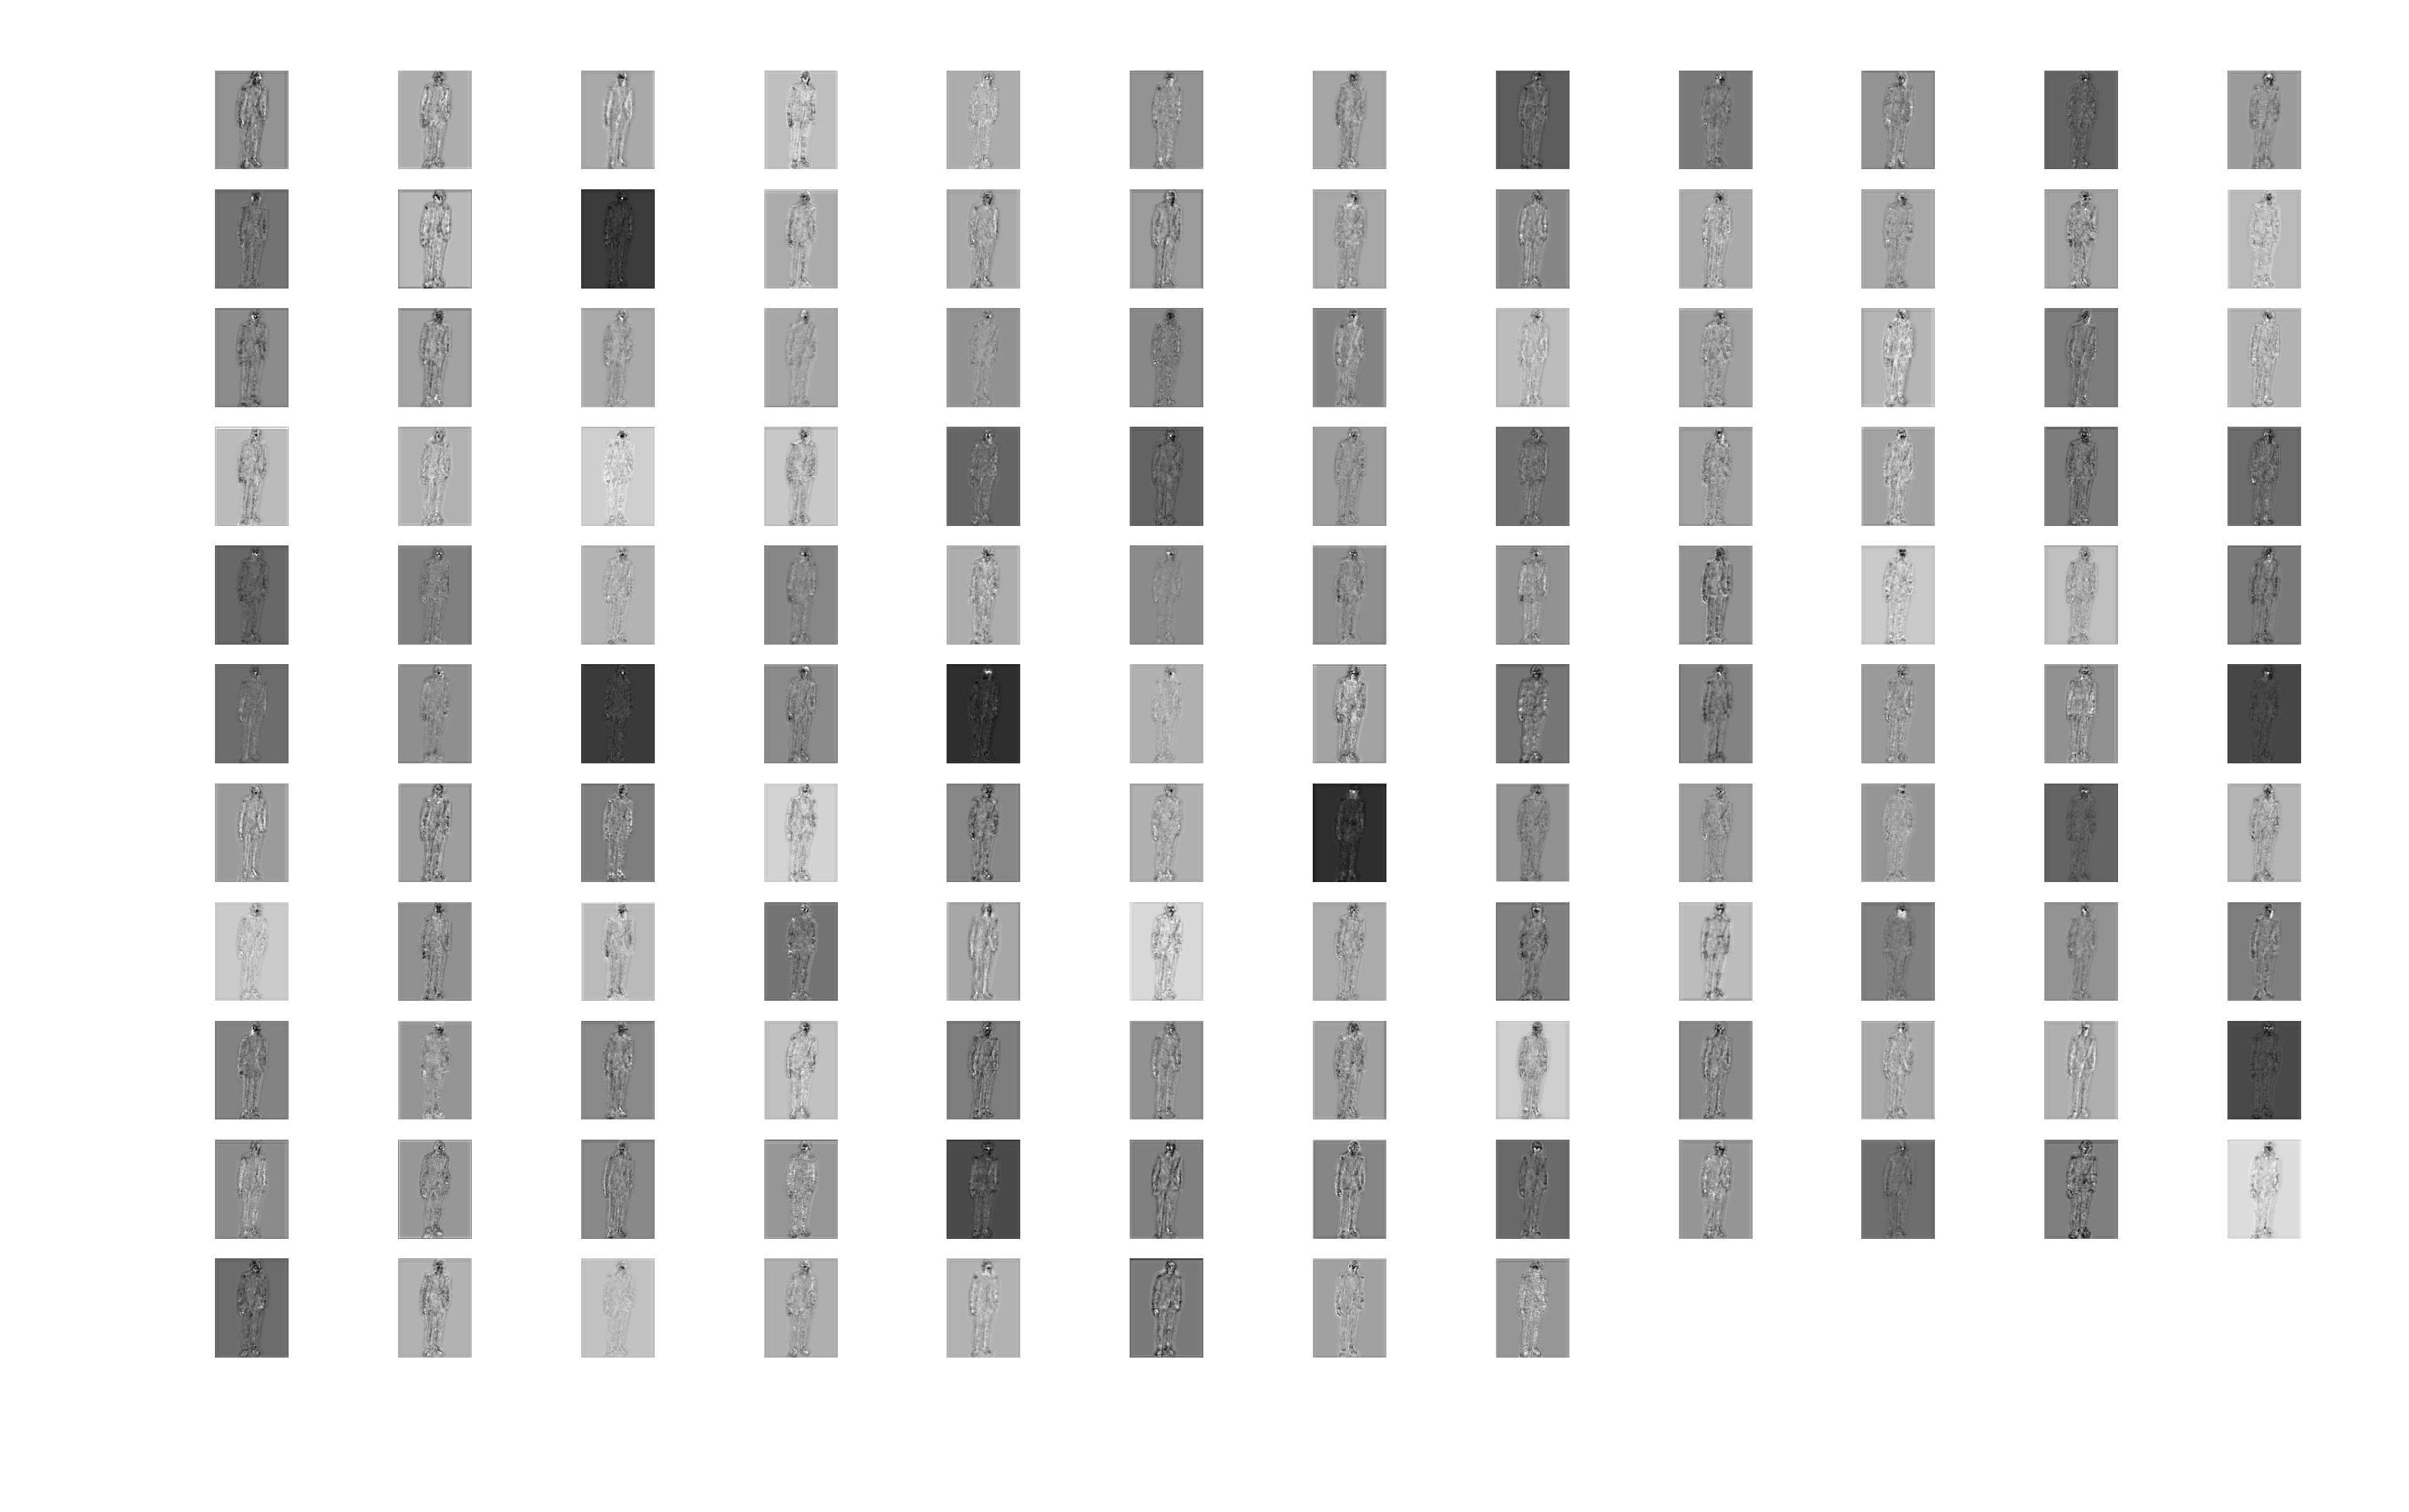

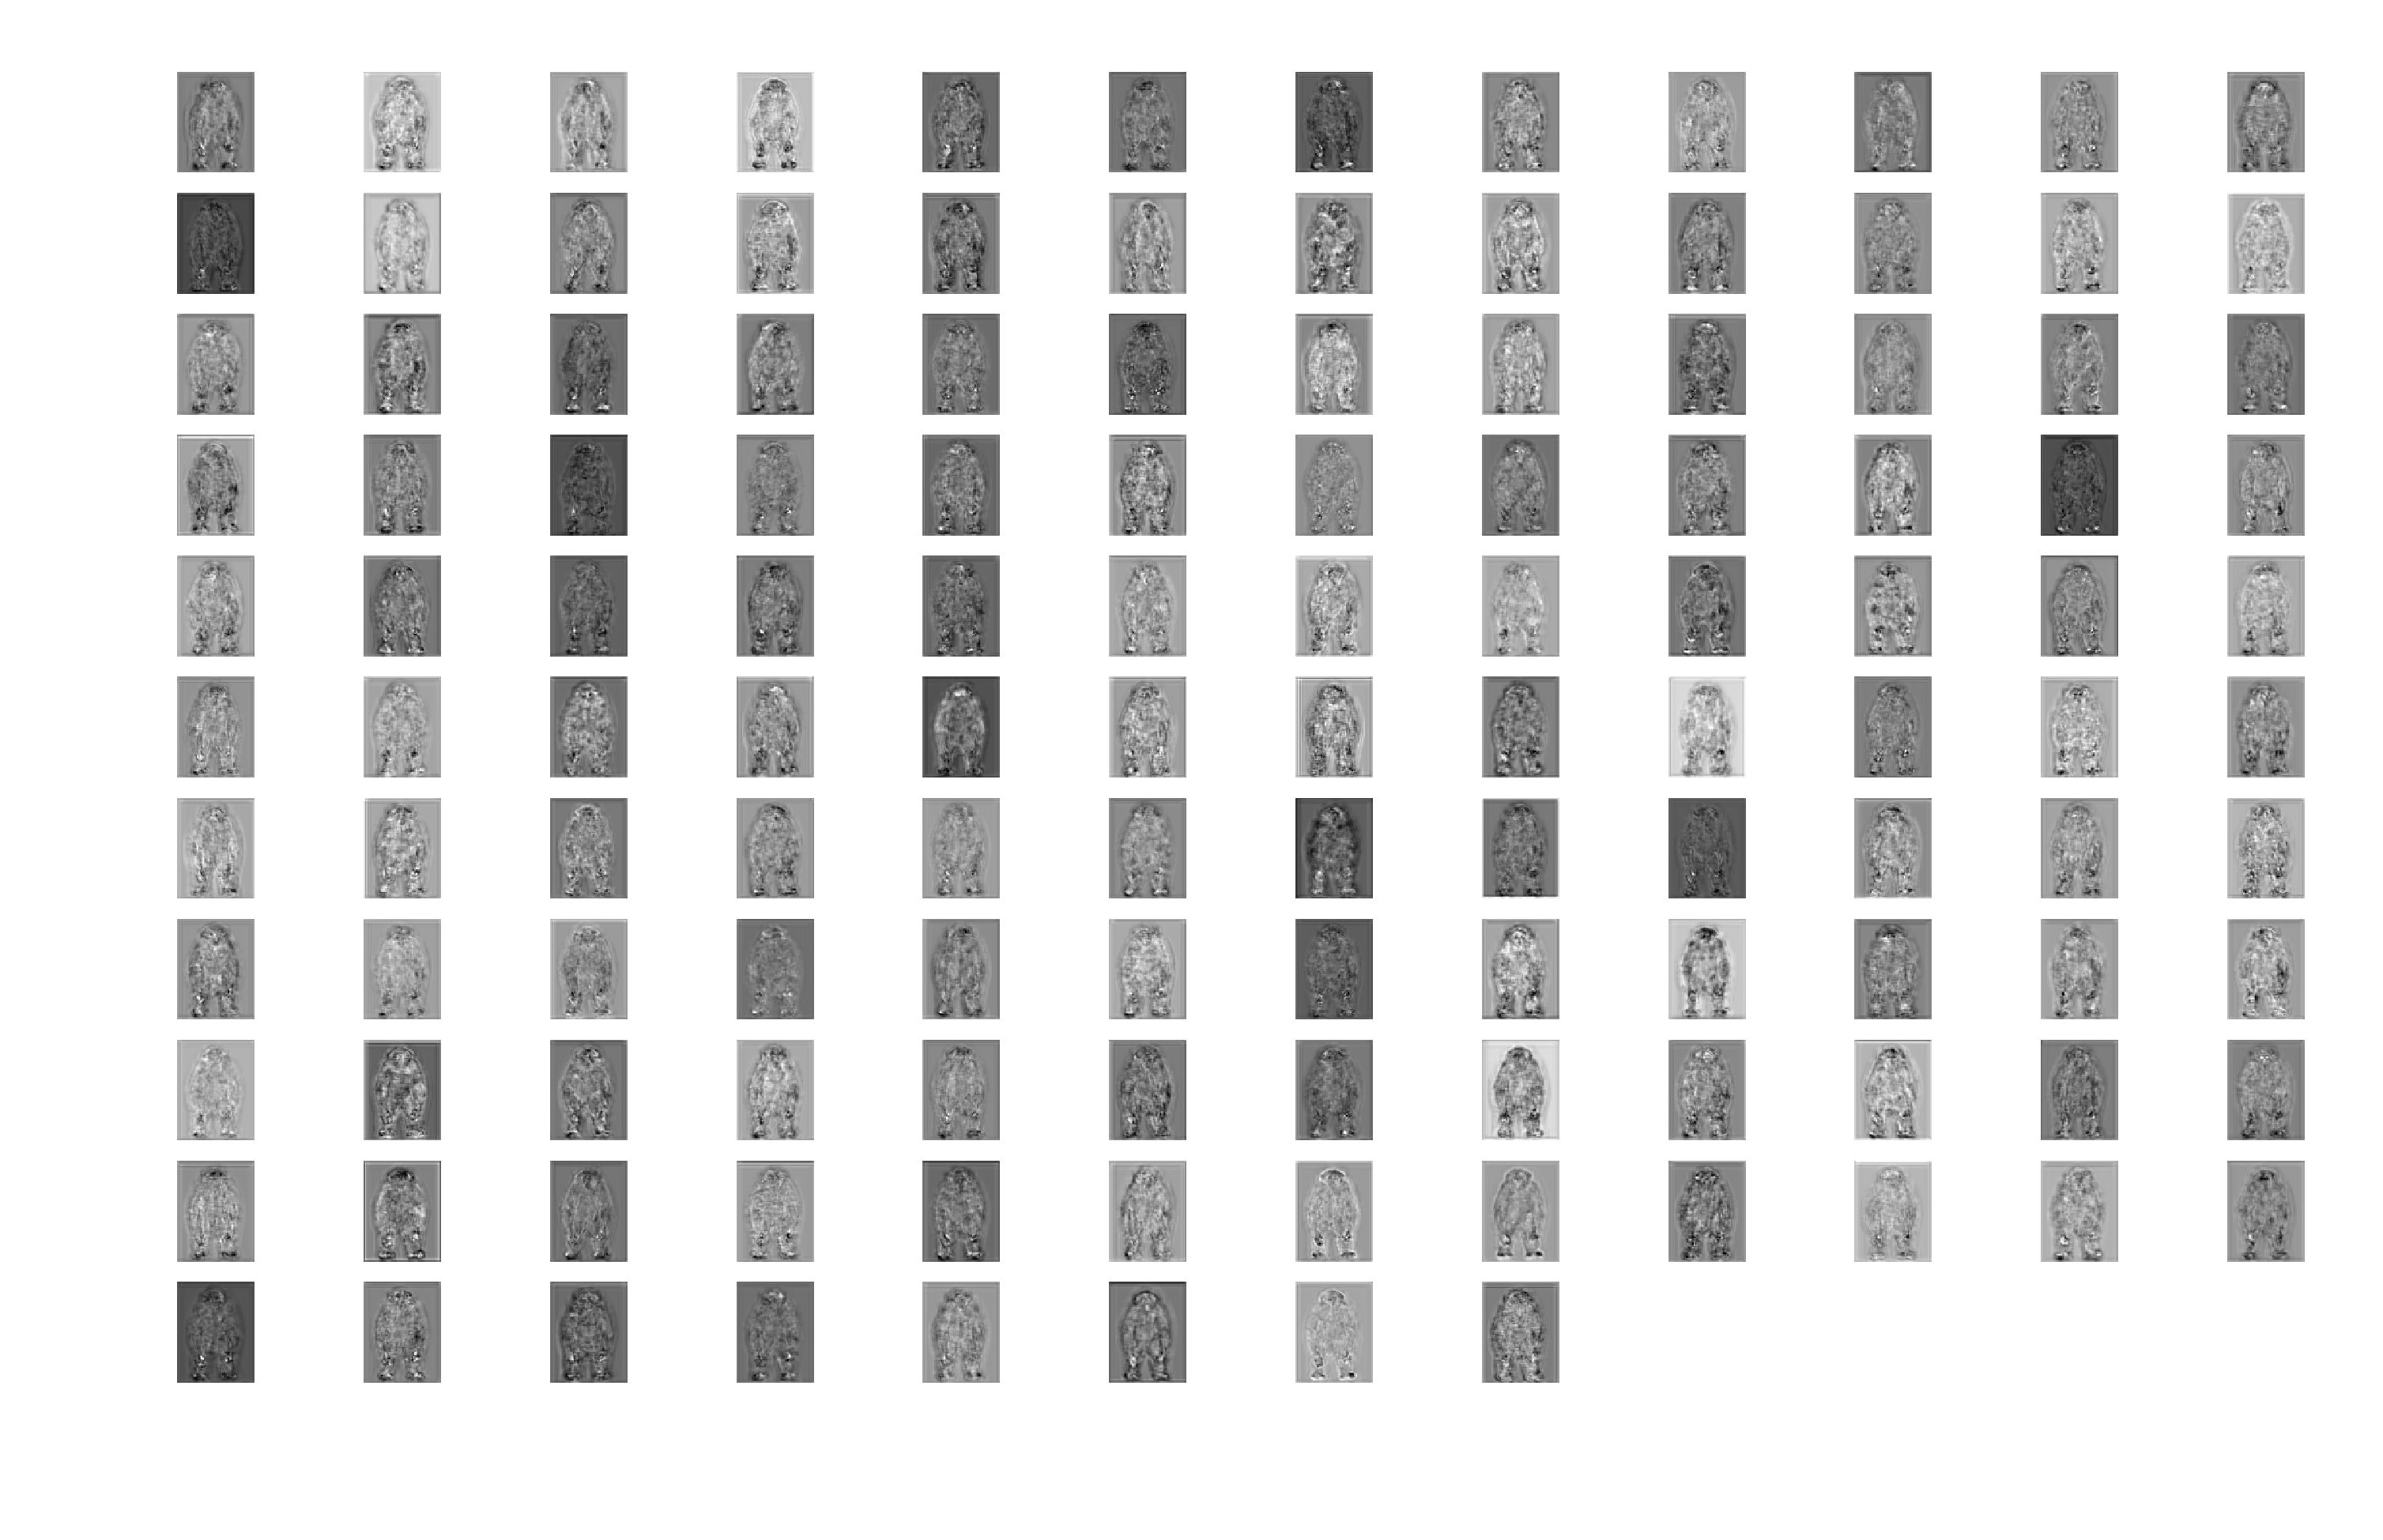

In [48]:
# Specify the layer to want to visualize
visualize_layer_output(model=model, layer_name="conv4_4_CPM", data=image)
visualize_layer_output(model=model, layer_name="conv4_4_CPM", data=c_image)

In [ ]:
def visualize_layer_weight(model, layer_name):
    intermediate_weights = model.get_layer(layer_name).get_weights()
    
    #intermediate_weights = np.squeeze(intermediate_weights)
    print(intermediate_weights[0].shape)
    
    n = intermediate_weights[0].shape[3]
    n = int(np.ceil(np.sqrt(n)))
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(intermediate_weights[0].shape[3]):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(np.squeeze(np.squeeze(intermediate_weights[0][:,:,:,i:i+1])), cmap='gray')

In [ ]:
visualize_layer_weight(model=model, layer_name="conv1")

In [54]:
vgg_layers = ['conv1_1', 'conv1_2', 'conv2_1', 'conv2_2', 'conv3_1', 'conv3_2', 'conv3_3', 'conv3_4', 'conv4_1', 'conv4_2', 'conv4_3_CPM', 'conv4_4_CPM']
for i in vgg_layers:
    print(i)

conv1_1
conv1_2
conv2_1
conv2_2
conv3_1
conv3_2
conv3_3
conv3_4
conv4_1
conv4_2
conv4_3_CPM
conv4_4_CPM
